In [52]:
import cv2
import sqlite3
from matplotlib import pyplot as plt
import numpy as np

from visualize_model import Model
from database import blob_to_array, pair_id_to_image_ids

# 1. 3D mesh reconstruction from a set of images from the Gerrard Hall dataset.
Install Colmap and run the automatic reconstruction on the Gerrard Hall dataset

# 2. Analyze reconstructions using python
## 2.1. Run the notebook, using the Gerrard Hall reconstruction (0.5)
#### <span style='color:Green'> - Add the path to your reconstruction. Answer the questions at the end  </span>

In [53]:
# Add your path
reconstruction_path = "C:\\Users\\yeray142\\Desktop\\colmap\\test\\sparse\\0"
database_path = "C:\\Users\\yeray142\\Desktop\\colmap\\test\\database.db"

#### Load an existing reconstruction and print its contents

In [54]:
model = Model()
model.read_model(reconstruction_path, ext='.bin') # Should also work with .txt

In [55]:
images = model.images
cameras = model.cameras
points3D = model.points3D

In [56]:
print(f"Loaded {len(images)} images. This is the information available for one of them:")
print(images[1])
print(f"\nLoaded {len(cameras)} cameras. This is the information available for one of them:")
print(cameras[1])
print(f"\nLoaded {len(points3D)} 3D points. This is the information available for one of them:")
print(points3D[1])

Loaded 100 images. This is the information available for one of them:
Image(id=1, qvec=array([-0.1449726 ,  0.02211628,  0.9665298 , -0.2105088 ]), tvec=array([0.97434014, 1.11417185, 4.52851863]), camera_id=1, name='IMG_2331.JPG', xys=array([[2.80800009e+00, 2.81081080e+00],
       [2.80800009e+00, 2.81081080e+00],
       [2.80800009e+00, 2.81081080e+00],
       ...,
       [2.82338696e+03, 2.80359326e+03],
       [1.73570654e+03, 1.12507373e+03],
       [8.85080811e+02, 2.85430884e+03]], shape=(2685, 2)), point3D_ids=array([-1, -1, -1, ..., -1, -1, -1], shape=(2685,)))

Loaded 1 cameras. This is the information available for one of them:
Camera(id=1, model='SIMPLE_RADIAL', width=5616, height=3744, params=array([ 3.83791173e+03,  2.80800000e+03,  1.87200000e+03, -7.04116288e-02]))

Loaded 12369 3D points. This is the information available for one of them:
Point3D(id=1, xyz=array([ 0.83225795, -1.39173405, -1.51373012]), rgb=array([189, 190, 185]), error=array(2.09024185), image_ids=ar

#### Load the database

In [57]:
db = sqlite3.connect(database_path)

In [58]:
keypoints = dict(
        (image_id, blob_to_array(data, np.float32, (-1, 2)))
        for image_id, data in db.execute("SELECT image_id, data FROM keypoints")
    )

In [59]:
print(f"Loaded keypoints from {len(keypoints)} images. These are the {len(keypoints[1])} keypoints for one of them:")
print(keypoints[1])

Loaded keypoints from 100 images. These are the 8055 keypoints for one of them:
[[ 2.8080001e+00  2.8108108e+00]
 [ 8.9523926e+00 -7.7258450e-01]
 [ 7.7181190e-01  8.9613533e+00]
 ...
 [ 8.8508081e+02  2.8543088e+03]
 [ 2.3080800e+02 -2.8800241e+02]
 [ 2.8771442e+02  2.3103903e+02]]


In [60]:
matches = dict()
count_no_data = 0
for pair_id, data in db.execute("SELECT pair_id, data FROM matches"):
    if data is None:
        count_no_data += 1
    else:
        matches[pair_id_to_image_ids(pair_id)] = blob_to_array(data, np.uint32, (-1, 2))
print(f"Loaded {len(matches)} matches. {count_no_data}/{len(matches)+count_no_data} matches contained no data")

Loaded 1156 matches. 3794/4950 matches contained no data


In [61]:
print("These are the matches between two images:")
print(matches[1,3])

These are the matches between two images:
[[1074  124]
 [1111  177]
 [1120  189]
 [1123  198]
 [1130  214]
 [1183  270]
 [1185  268]
 [1222  319]
 [1247  358]
 [1328  449]
 [1354  486]
 [1364  491]
 [1385  517]
 [1386  523]
 [1387  524]
 [1410  555]
 [1413  558]
 [1414  559]
 [1416  562]
 [1417  564]
 [1431  581]
 [1434 1136]
 [1441  593]
 [1451  606]
 [1454 1152]
 [1456  609]
 [1474  627]
 [1488  650]
 [1498 1209]
 [1506  681]
 [1507  690]
 [1508  691]
 [1511 1222]
 [1512  696]
 [1524  705]
 [1525  713]
 [1527  724]
 [1528  723]
 [1546  733]
 [1547  728]
 [1555  750]
 [1559  749]
 [1560  748]
 [1561  732]
 [1706  872]
 [1759  939]
 [1765  947]
 [1766  948]
 [1768  956]
 [1772  962]
 [1774  963]
 [1813 1014]
 [1881 1104]
 [1883  536]
 [1887 1116]
 [1888 1117]
 [1891 1122]
 [1893 1124]
 [1901 1135]
 [1902  588]
 [1903  587]
 [1905  592]
 [1909  604]
 [1913 1158]
 [1924 1169]
 [1927 1175]
 [1942 1515]
 [1944 1200]
 [1945 1208]
 [1947 1201]
 [1950 1215]
 [1953 1217]
 [1954 1218]
 [1959 12

#### Visualize the point cloud and cameras

In [62]:
model.create_window()
model.add_points()
model.add_cameras(scale=0.25)
model.show()

#### <span style='color:Green'>  How many keypoints there are in total? </span> 

In [63]:
total_keypoints = sum(len(kp) for kp in keypoints.values())
print(f"Total number of keypoints across all images: {total_keypoints}")

Total number of keypoints across all images: 791916


#### <span style='color:Green'>  How many 3D points originated from a keypoint in the first image? </span>


In [64]:
# Get the first image in images dictionary
key = next(iter(images.keys()))

img = images.get(key)
points3D_from_first = sum(1 for point3D_id in img.point3D_ids if point3D_id != -1)

print(f"Number of 3D points from the first image: {points3D_from_first}")

Number of 3D points from the first image: 220


## 2.2 Plot the 3D points coloured according to the number of images and error. (0.5)

#### <span style='color:Green'> - Plot the 3D points coloured according to the **number of images** from which it originated. </span> Can you extract any conclusions from the visualization? 

In [65]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Convert the data to the correct format first
point_data = []
for point_id, point in points3D.items():
    point_data.append({
        'x': float(point.xyz[0]),  # Ensure these are regular floats
        'y': float(point.xyz[1]),
        'z': float(point.xyz[2]),
        'n_images': int(len(point.image_ids)),  # Convert to regular int
        'error': float(point.error),  # Convert to regular float
        'point_id': int(point_id)  # Convert to regular int
    })

# Create DataFrame from the processed data
df = pd.DataFrame(point_data)

# Create figure with secondary y-axis
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=('Number of Images per Point', 'Reprojection Error')
)

# Add traces for number of images
fig.add_trace(
    go.Scatter3d(
        x=df['x'].values,  # Use .values to convert to numpy array
        y=df['y'].values,
        z=df['z'].values,
        mode='markers',
        marker=dict(
            size=2,
            color=df['n_images'].values,  # Use .values here too
            colorscale='Viridis',
            colorbar=dict(title='# Images', x=0.45),
            showscale=True
        ),
        hovertemplate=
        '<b>Point ID</b>: %{text}<br>' +
        '<b>X</b>: %{x:.2f}<br>' +
        '<b>Y</b>: %{y:.2f}<br>' +
        '<b>Z</b>: %{z:.2f}<br>' +
        '<b># Images</b>: %{marker.color}<br>',
        text=df['point_id'].values
    ),
    row=1, col=1
)

# Add traces for error
fig.add_trace(
    go.Scatter3d(
        x=df['x'].values,
        y=df['y'].values,
        z=df['z'].values,
        mode='markers',
        marker=dict(
            size=2,
            color=df['error'].values,
            colorscale='Viridis',
            colorbar=dict(title='Error', x=1),
            showscale=True
        ),
        hovertemplate=
        '<b>Point ID</b>: %{text}<br>' +
        '<b>X</b>: %{x:.2f}<br>' +
        '<b>Y</b>: %{y:.2f}<br>' +
        '<b>Z</b>: %{z:.2f}<br>' +
        '<b>Error</b>: %{marker.color:.3f}<br>',
        text=df['point_id'].values
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text="3D Points Visualization",
    showlegend=False,
    width=1400,
    height=700,
)

# Update scenes
for i in [1, 2]:
    fig.update_scenes(
        dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            aspectmode='data'
        ),
        row=1, col=i
    )

fig.show()

#### <span style='color:Green'> - Plot the 3D points coloured according to the **error**. </span> - What is this parameter? Can you extract any conclusions from the visualization?

In [66]:
### TO DO 2.2

# This is done in the previous code cell.

## 2.3 Plot the 3D points that correspond to a keypoint in the first image. Also plot the image with the keypoints (1.0)


In [90]:
import plotly.graph_objects as go
import cv2
import numpy as np

# Get first image data
image_id = 1
img_data = images[image_id]

print(f"Image data for image ID {img_data.name}:")

# Load and convert image
base_path = "C:\\Users\\yeray142\\Desktop\\colmap\\gerrard-hall\\images"
image_path = f"{base_path}/{img_data.name}"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get 3D points and corresponding keypoints
point3D_ids = img_data.point3D_ids
points3D_coords = []
valid_keypoints = []

# Make sure keypoints are properly loaded
keypoints_image = keypoints[image_id]  # Get keypoints for this image

# Collect valid 3D points and their corresponding keypoints
for idx, point3D_id in enumerate(point3D_ids):
    if point3D_id != -1:  # -1 means no corresponding 3D point
        points3D_coords.append(points3D[point3D_id].xyz)

points3D_coords = np.array(points3D_coords)

# 1. 3D Points Visualization with Plotly
fig_3d = go.Figure(data=[
    go.Scatter3d(
        x=points3D_coords[:, 0],
        y=points3D_coords[:, 1],
        z=points3D_coords[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color='blue',
        ),
        name='3D Points'
    )
])

fig_3d.update_layout(
    title_text="3D Points from First Image",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z",
    ),
    width=800,
    height=800,
)

# Show 3D plot
fig_3d.show()

Image data for image ID IMG_2331.JPG:


Reading image: IMG_2331.JPG


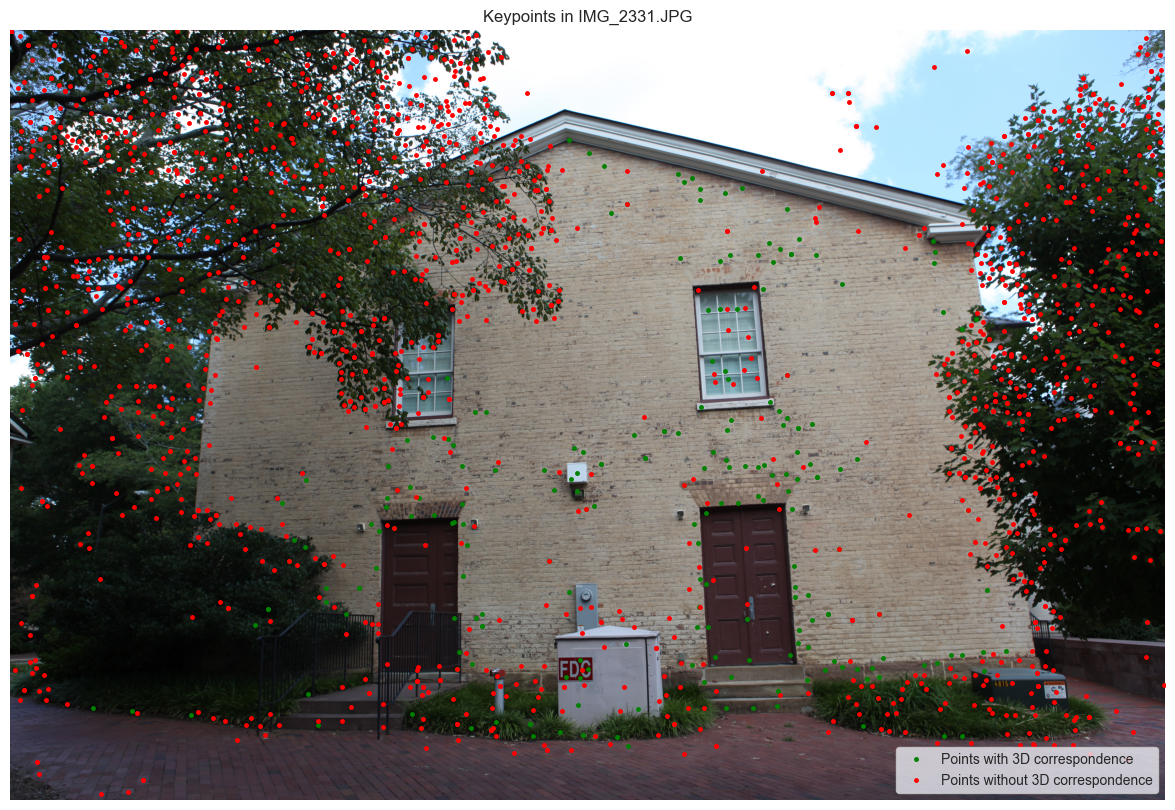

Total keypoints: 2685
Keypoints with 3D correspondence: 220
Keypoints without 3D correspondence: 2465


In [91]:
import matplotlib.pyplot as plt

def parse_image_data(file_path):
    images_data = {}
    current_image_id = None
    reading_points = False
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
        
        for line in lines:
            # Skip comment lines
            if line.startswith('#') or not line.strip():
                continue
            
            parts = line.strip().split()
            
            # If we're not reading points and the line has 9 or more parts, it's an image header
            if not reading_points:
                current_image_id = int(parts[0])
                images_data[current_image_id] = {
                    'pose': {
                        'qw': float(parts[1]),
                        'qx': float(parts[2]),
                        'qy': float(parts[3]),
                        'qz': float(parts[4]),
                        'tx': float(parts[5]),
                        'ty': float(parts[6]),
                        'tz': float(parts[7])
                    },
                    'camera_id': int(parts[8]),
                    'name': parts[9] if len(parts) > 9 else '',
                    'keypoints': []
                }
                reading_points = True
            else:
                # Parse points (X, Y, POINT3D_ID)
                points = []
                for i in range(0, len(parts), 3):
                    if i+2 < len(parts):
                        points.append({
                            'x': float(parts[i]),
                            'y': float(parts[i+1]),
                            'point3d_id': int(float(parts[i+2]))
                        })
                if current_image_id is not None:
                    images_data[current_image_id]['keypoints'] = points
                reading_points = False
                    
    return images_data

# Parse the data
file_path = 'C:\\Users\\yeray142\\Desktop\\colmap\\test\\txt\\images.txt'
images_data = parse_image_data(file_path)

# Get the first image data
first_image = images_data[image_id]
image_name = first_image['name']
print(f"Reading image: {image_name}")

# Plot the image and keypoints
plt.figure(figsize=(15, 10))
plt.imshow(img)

# Plot keypoints
keypoints = first_image['keypoints']
x_coords = [kp['x'] for kp in keypoints]
y_coords = [kp['y'] for kp in keypoints]

# Plot different colors for points with and without 3D correspondence
valid_points = [(x, y) for x, y, kp in zip(x_coords, y_coords, keypoints) if kp['point3d_id'] != -1]
invalid_points = [(x, y) for x, y, kp in zip(x_coords, y_coords, keypoints) if kp['point3d_id'] == -1]

if valid_points:
    valid_x, valid_y = zip(*valid_points)
    plt.plot(valid_x, valid_y, 'g.', markersize=5, label='Points with 3D correspondence')

if invalid_points:
    invalid_x, invalid_y = zip(*invalid_points)
    plt.plot(invalid_x, invalid_y, 'r.', markersize=5, label='Points without 3D correspondence')

plt.title(f'Keypoints in {image_name}')
plt.legend()
plt.axis('off')
plt.show()

# Print some statistics
print(f"Total keypoints: {len(keypoints)}")
print(f"Keypoints with 3D correspondence: {len(valid_points)}")
print(f"Keypoints without 3D correspondence: {len(invalid_points)}")

## 2.4 Create a visualization for the number of matches between all images. (1.0)
For example: https://seaborn.pydata.org/generated/seaborn.heatmap.html


Match Statistics:
Total images: 100
Total image pairs with matches: 1156
Average matches per pair: 158.8
Min matches: 15
Max matches: 1543
Median matches: 51


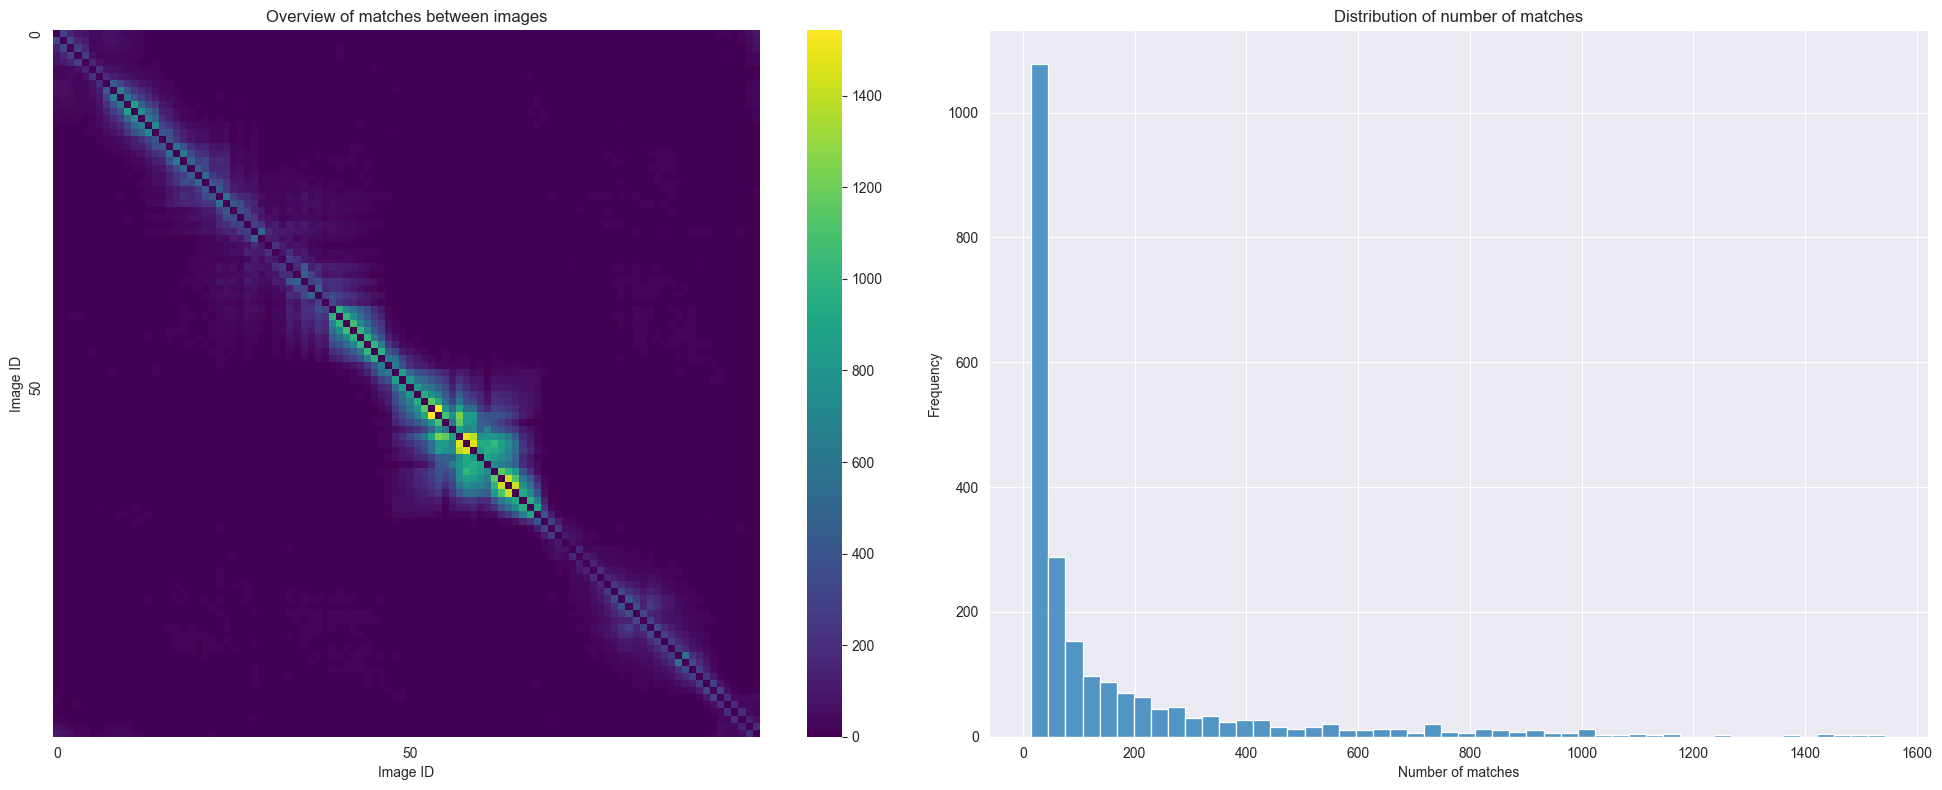

In [92]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get the number of images
n_images = len(images)

# Create a matrix to store number of matches between images
match_matrix = np.zeros((n_images, n_images))

# Fill the matrix with number of matches
for (id1, id2), match_data in matches.items():
    if match_data is not None:
        idx1 = int(id1) - 1
        idx2 = int(id2) - 1
        if 0 <= idx1 < n_images and 0 <= idx2 < n_images:
            n_matches = len(match_data)
            match_matrix[idx1, idx2] = n_matches
            match_matrix[idx2, idx1] = n_matches

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Heatmap without annotations for overview
sns.heatmap(match_matrix, 
            cmap='viridis',
            square=True,
            xticklabels=50,  # Show every 50th label
            yticklabels=50,
            ax=ax1)
ax1.set_title('Overview of matches between images')
ax1.set_xlabel('Image ID')
ax1.set_ylabel('Image ID')

# 2. Distribution of number of matches
match_counts = match_matrix[match_matrix > 0]  # Get non-zero matches
sns.histplot(match_counts, bins=50, ax=ax2)
ax2.set_title('Distribution of number of matches')
ax2.set_xlabel('Number of matches')
ax2.set_ylabel('Frequency')

plt.tight_layout()

# Print statistics
print("\nMatch Statistics:")
print(f"Total images: {n_images}")
print(f"Total image pairs with matches: {len(matches)}")
print(f"Average matches per pair: {match_matrix.sum()/(2*len(matches)):.1f}")
print(f"Min matches: {match_matrix[match_matrix > 0].min():.0f}")
print(f"Max matches: {match_matrix.max():.0f}")
print(f"Median matches: {np.median(match_matrix[match_matrix > 0]):.0f}")

## 2.5 Visualize the keypoints and matches between the two images used in lab 3 using Colmap, how it compares to the results from lab 3? (1.0)
#### <span style='color:Green'> You can use the GUI to get the keypoints and matches and then visualize it here, following the same style as in lab 3 to get comparable results. </span>

In [78]:
### TO DO 2.5


## 2.6 Triangulate and visualize the 3D points from the keypoints extracted using Colmap on the two images used in lab 3, how it compares to the results from lab 3? (1.0) 
#### <span style='color:Green'> - Use the triangulation from lab 3 to the get the 3D points and visualize them following the same style. </span>

In [79]:
### TO DO 2.6

## 2.7 Visualize the sparse reconstruction using the 2 images from lab 3, and the complete CASTLE dataset. Comment on the differences between techniques and number of images used. (1.0)
#### <span style='color:Green'> - Use the reconstruction from Colmap to the get the 3D points and visualize them following the same style, using two images and the complete dataset. </span>

In [80]:
### TO DO 2.7